In [2]:
import gudhi as gd
import pandas as pd
from ripser import ripser
from persim import plot_diagrams

In [3]:
df = pd.read_csv('../raw/mpv-data.csv')
print(df.shape)
df = df[['latitude','longitude', 'state']]
ne = df[df['state']=='NE']
ne.drop(columns = 'state', inplace = True)
ne = ne.values.tolist()

(10454, 62)


/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_17447/455385558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ne.drop(columns = 'state', inplace = True)


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

<Figure size 432x288 with 0 Axes>

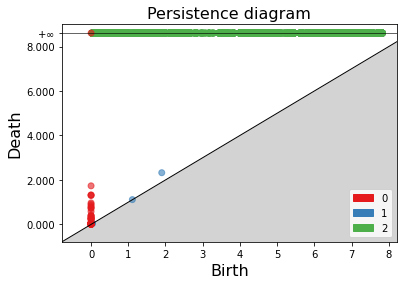

In [97]:
#distance_matrix = gd.read_lower_triangular_matrix_from_csv_file(csv_file='../clean/pd_data/MI/mi_dist.csv')
#rips_complex = gd.RipsComplex(distance_matrix=distance_matrix)
with open('../clean/lat_long_mi.pkl', 'rb') as f:
    mi = pickle.load(f)

rips_complex = gd.RipsComplex(points = ne, max_edge_length = 10e8)
simplex_tree = rips_complex.create_simplex_tree(max_dimension = 2)
dgm = simplex_tree.persistence(persistence_dim_max = True)
plt.figure()
gd.plot_persistence_diagram(dgm, legend = True)

In [48]:
with open('../clean/lat_long_mi.pkl', 'rb') as f:
    mi = pickle.load(f)
 

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

<Figure size 432x288 with 0 Axes>

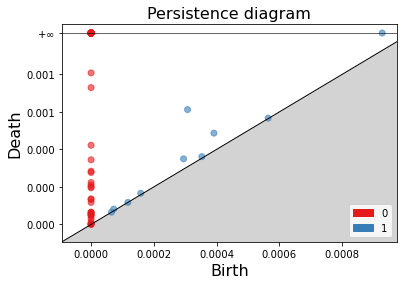

In [92]:
alpha_complex = gd.AlphaComplex(points=ne)
simplex_tree = alpha_complex.create_simplex_tree()
simplex_tree.prune_above_filtration(0.001)
dgm = simplex_tree.persistence(persistence_dim_max = True)
plt.figure()
gd.plot_persistence_diagram(dgm, legend = True)

In [ ]:
from scipy.spatial import Delaunay

def sq_norm(v): #squared norm 
    return np.linalg.norm(v)**2

def circumcircle(points,simplex):
    A=[points[simplex[k]] for k in range(3)]
    M=[[1.0]*4]
    M+=[[sq_norm(A[k]), A[k][0], A[k][1], 1.0 ] for k in range(3)] 
    M=np.asarray(M, dtype=np.float32) 
    S=np.array([0.5*np.linalg.det(M[1:,[0,2,3]]), -0.5*np.linalg.det(M[1:,[0,1,3]])]) 
    a=np.linalg.det(M[1:, 1:]) 
    b=np.linalg.det(M[1:, [0,1,2]]) 
    return S/a,  np.sqrt(b/a+sq_norm(S)/a**2) #center=S/a, radius=np.sqrt(b/a+sq_norm(S)/a**2)

def get_alpha_complex(alpha, points, simplexes):
    #alpha is the parameter for the alpha shape
    #points are given data points 
    #simplexes is the  list of indices in the array of points 
    #that define 2-simplexes in the Delaunay triangulation
    
    return filter(lambda simplex: circumcircle(points,simplex)[1]<alpha, simplexes)

pts=mi
tri = Delaunay(pts)

colors=['#C0223B', '#404ca0', 'rgba(173,216,230, 0.5)']# colors for vertices, edges and 2-simplexes


def Plotly_data(points, complex_s):
    #points are the given data points, 
    #complex_s is the list of indices in the array of points defining 2-simplexes(triangles) 
    #in the simplicial complex to be plotted
    X=[]
    Y=[]
    for s in complex_s:
        X+=[points[s[k]][0] for k in [0,1,2,0]]+[None]
        Y+=[points[s[k]][1] for k in [0,1,2,0]]+[None]
    return X,Y  

def make_trace(x, y,  point_color=colors[0], line_color=colors[1]):# define the trace
                                                                   #for an alpha complex
    return Scatter(mode='markers+lines', #set vertices and 
                                         #edges of the alpha-complex
                   name='',
                   x=x,
                   y=y,
                   marker=Marker(size=6.5, color=point_color),
                   line=Line(width=1.25, color=line_color),
                   
                  )


def make_XAxis(axis_style):
    return XAxis(axis_style)
    
def make_YAxis(axis_style):
    return YAxis(axis_style)  

figure = tls.make_subplots(rows=1, cols=2,
                           subplot_titles=('Delaunay triangulation',  'Alpha shape, alpha=0.15'),
                           horizontal_spacing=0.1, 
                          )

pl_width=800
pl_height=460
title = 'Delaunay triangulation and Alpha Complex/Shape for a Set of 2D Points'

figure['layout'].update(title=title,                                 
                        font= Font(family="Open Sans, sans-serif"),
                        showlegend=False,     
                        hovermode='closest',  
                        autosize=False,       
                        width=pl_width,       
                        height=pl_height,
                        margin=Margin(
                            l=65,
                            r=65,
                            b=85,
                            t=120
                            ),           
                       shapes=[]
                       )  

axis_style = dict(showline=True, 
                  mirror=True,
                  zeroline=False,
                  showgrid=False,
                  showticklabels=T)

In [28]:
token = 'pk.eyJ1IjoiZGtpbnNtYW4wMSIsImEiOiJjbDluNDJxYjQwNDNrM29sN2t3bmx3MXRsIn0.Q7S0ZIH_5U5fQV7JRNeaVg'
with open('../clean/lat_long_mi.pkl', 'rb') as f:
    mi = pickle.load(f)
    
mi_df = pd.DataFrame(mi)
mi_df.head(10)
# geo_df = gpd.GeoDataFrame(
#     mi_df, geometry=gpd.points_from_xy(mi_df[0], mi_df[1]))

# px.set_mapbox_access_token(token)
# fig = px.scatter_mapbox(geo_df,
#                         lat=geo_df.geometry.x,
#                         lon=geo_df.geometry.y,
#                         zoom=5)
# #L.circle([lat,lon], radius).addTo(map)
# fig.show()

,0,1
0,42.250000,-84.760000
1,42.390000,-83.610000
2,42.502110,-82.963032
3,42.116150,-86.441536
4,42.930837,-85.639344
5,42.110000,-84.290000
6,42.281911,-85.589556
7,43.168290,-83.016580
8,42.391744,-82.969137
9,42.330000,-83.050000


In [45]:
import folium

m = folium.Map(location = [44.25,-84], zoom_start = 5.5)

for i in range(0, len(mi_df)):
    folium.Circle(
        location = [mi_df.iloc[i][0], mi_df.iloc[i][1]],
        radius = 1100,
        fill_color = 'blue').add_to(m)
    folium.Marker(location=[mi_df.iloc[i][0], mi_df.iloc[i][1]])
m

In [12]:
from ripser import Rips
import tadasets

data = tadasets.dsphere(n=110, d=2)[0]
rips = Rips()
rips.transform(data)
rips.plot()

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [6]:
np.array(mi)


array([[ 42.25     , -84.76     ],
       [ 42.39     , -83.61     ],
       [ 42.50211  , -82.9630323],
       [ 42.11615  , -86.441536 ],
       [ 42.9308369, -85.639344 ],
       [ 42.11     , -84.29     ],
       [ 42.2819109, -85.5895564],
       [ 43.16829  , -83.01658  ],
       [ 42.3917439, -82.9691372],
       [ 42.33     , -83.05     ],
       [ 45.33     , -84.54     ],
       [ 42.38306  , -83.081055 ],
       [ 42.30826  , -85.177211 ],
       [ 43.111412 , -83.69437  ],
       [ 42.4358052, -82.9649628],
       [ 42.295038 , -85.583478 ],
       [ 42.881485 , -85.641945 ],
       [ 42.532709 , -85.513956 ],
       [ 42.28865  , -85.41806  ],
       [ 41.793547 , -86.24508  ],
       [ 42.201737 , -85.339873 ],
       [ 42.377128 , -83.05282  ],
       [ 42.363105 , -85.878968 ],
       [ 42.907686 , -84.182803 ],
       [ 46.12047  , -88.618995 ],
       [ 42.651702 , -85.976468 ],
       [ 43.042496 , -83.694212 ],
       [ 43.698735 , -85.956523 ],
       [ 42.761514 ,